In [1]:
#Import dependencies
from nn import NeuralNetwork
from nn import preprocess
from nn import io
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

# Rationale for Sampling Scheme
Because the relative abundance of negative examples is much greater than that of positive examples, I decided to sample a small fraction of the negative examples. In my implementation of sample_seqs, I randomly sample, with replacement, 137 known negative examples. From each of these 137 sequences, I randomly select a 17-mer to ensure that all examples are of the same sequence length. 

In [2]:
#Process data for training
pos_file = 'data/rap1-lieb-positives.txt'
neg_file = 'data/yeast-upstream-1k-negative.fa'

#Load sequences and labels
pos_seqs = io.read_text_file(pos_file)
pos_labels = [1] * len(pos_seqs)
neg_seqs = io.read_fasta_file(neg_file)
neg_labels = [0] * len(neg_seqs)
seqs = pos_seqs + neg_seqs
labels = pos_labels + neg_labels

#Sample sequences
seed = 1 #set seed for reproducibility
sampled_seqs, sampled_labels = preprocess.sample_seqs(seqs,labels,1)
print(len(sampled_seqs))

#Generate training and validation sets
split_percent = .3
X_train, X_val, y_train, y_val = train_test_split(sampled_seqs, sampled_labels, test_size=split_percent, random_state=42)

#Reshape and one hot encode training and validation sets  
X_train = np.array(preprocess.one_hot_encode_seqs(X_train)).T
X_val = np.array(preprocess.one_hot_encode_seqs(X_val)).T
y_train = np.array([y_train])
y_val = np.array([y_val])

X = np.concatenate((X_train, X_val),axis=1)
y = np.concatenate((y_train, y_val),axis=1)

4073
(68, 2851)
(1, 2851)


In [3]:
#Define hyperparameters
nn_arch = [{'input_dim' :  68, 'output_dim' : 34, 'activation' : 'sigmoid'}, 
           {'input_dim' : 34, 'output_dim' : 1, 'activation' : 'sigmoid'}]
lr = 0.00001
seed1 = 1
seed2 = 2
batch_size = 400
epochs = 1000
loss_function = 'bce'

In [4]:
#Train classifier
classifier = NeuralNetwork(nn_arch, lr, seed2, batch_size, epochs, loss_function)
train_loss, val_loss = classifier.fit(X_train, y_train, X_val, y_val)

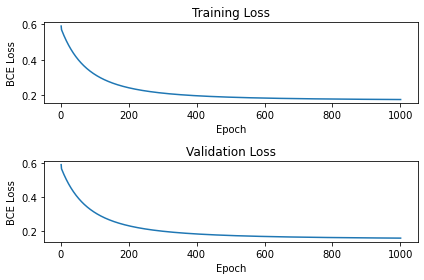

In [8]:
#Plot losses
epochs = np.linspace(1, len(train_loss), len(train_loss))
fig,axs = plt.subplots(2)
axs[0].plot(epochs, train_loss)
axs[0].set_title('Training Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('BCE Loss')

axs[1].plot(epochs, val_loss)
axs[1].set_title('Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('BCE Loss')
fig.tight_layout()
plt.show()

In [13]:
#Generate predictions for all sequences in X_val
prediction = classifier.predict(X_val)

#Compute accuracy of trained neural network
accuracy = (y_val.shape[1] - np.count_nonzero(y_val - np.round(prediction))) / y_val.shape[1]
print(f'Accuracy: {accuracy}')

Accuracy: 0.9639934533551555
